<img alt="Banner" width="100%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/LuisCSGuimaraes/main/Banner.png">


*Um projeto inspirado por:*

<img alt="Sigmoidal logo" width="10%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

**Data Science na Prática**
*by [sigmoidal.ai](https://sigmoidal.ai)*


# Churn Prediction

Em uma definição generalista, *churn* é uma métrica que indica  o **número de clientes que cancelam** um serviço em um determinado período de tempo.

A taxa de *churn* tem um efeito negativo na receita de uma empresa, por isso, entender o que é esse indicador e como trabalhar para midigar essa métrica é algo crítico para o sucesso de muitos negócios, já que entender por que seus clientes abandonam seu produto ou serviço é vital para conquistar um **crescimento sustentável**.

Hoje, especialmente com o crescimento de modelos de negócios por assinatura, o modelo *SaaS*, o Churn (ou **índice de cancelamento de clientes**) passou a ser mais conhecido (*Adaptado de [Resultados Digitais](https://resultadosdigitais.com.br/marketing/o-que-e-churn/)*).

<img alt="Churn_Body" width="100%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/ChurnPrediction/main/Images/churn_body.jpg">

Perder um cliente não significa apenas deixar de ganhar o valor de contrato, mas também todas as eventuais oportunidades de negócios e indicações para terceiros, com o chamado “Marketing boca a boca”, que poderiam surgir.

Além disso, uma receita a menos com a mesma infraestrutura significa, de modo geral, o **aumento dos custos fixos** relacionados para os demais contratantes e, consequentemente, a diminuição dos lucros provenientes ([Fonte](https://www.cortex-intelligence.com/blog/vendas/como-calcular-churn-de-clientes)).

Isso mostra que essa é uma métrica de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado, além disso, devemos nos ater ao fato de que o **Custo de Aquisição de Cliente (CAC)** é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

Churn também pode ser usado para identificar potenciais cancelamentos, com um **tempo de antecedência**. Este pprojeto utilizará dados anônimos de uma empresa de telecomunicações para desenvolver um modelo de *machine learning* que busca prever com uma alta acertividade a **probabilidade de cancelamento** de determinado cliente, com isso a empresa em questão poderia promover ações direcionadas para tentar reter tais clientes, diminuindo assim o *churn rate*. 

## Índice
- Fonte o obtenção dos dados
- Análise inicial
- Dicionário de variáveis
- Análise exploratória

## Fonte e obtenção dos dados

Os dados desse projeto foram disponibilizados originalmente na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#) e hoje estão disponíveis no [GitHub da empresa](https://github.com/IBM/telco-customer-churn-on-icp4d). 

Para evitar perdas caso o arquivo seja retirado do ar por qualquer motivo e possibilitar a replicabilidade do projeto, realizei uma cópia do *dataset* original e disponibilizei em meu GitHub. O arquivo pode ser acessado [aqui](https://raw.githubusercontent.com/LuisCSGuimaraes/ChurnPrediction/main/RawData/Telco-Customer-Churn.csv).

In [17]:
#Importando as bicliotecas para a fase inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importar os dados
DATA_PATH = "https://raw.githubusercontent.com/LuisCSGuimaraes/ChurnPrediction/main/RawData/Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

#Configurando o estilo gráfico dos plots 
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = "11"
plt.rcParams["text.color"] = "#515151"
cinza_texto="#515151"
sns.set_style("white")

#Exibindo a estrutura do dataframe e os valores iniciais
print("### Estrutura do dataframe ###\n")
print("Linhas:             ",df.shape[0])
print("Colunas (features): ",df.shape[1])
print("\n------------------------------\n")

df.head()



### Estrutura do dataframe ###

Linhas:              7043
Colunas (features):  21

------------------------------



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Vemos que a maior parte dos dados do *dataframe* são **categóricos** e existem poucos dados numéricos, isso significa que precisaremos realizar um processo de *encoding* de modo que o modelo consiga utilizar esses dados para realizar as previsões. Percebemos, também, que a variável `customerID` provalmente nos dá a **identificação única** de cada cliente. Se esse for o caso essa variável pode ser ignorada em nosso modelo.



## Análise inicial

Vejamos mais algumas informações a respeito dos dados que estamos trabalhando antes de passarmos para a etapa de construção do dicionário de variáveis.

In [18]:
#Exibindo informações de valores nulos e dos tipos de dados
print("### Exibindo informações do dataframe ###\n")
df.info()
print("\n---------------------------------------\n")
print("### Exibindo os valores únicos de cada coluna ###\n")
df.nunique()

### Exibindo informações do dataframe ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Conseguimos retirar mais algumas informações iniciais importantes a respeito dos dados:
- A variável `customerID` é única para cada linha do *dataframe*, isso significa que ela representa um valor de identificação único para cada cliente, como suspeitávamos. Logo, não precisamos utilizá-la;
- A maior parte das variáveis é categórica e assumem poucos valores, como já mencionado;
- Nossa variável alvo é a variável `churn`, que indica se houve ou não cancelamento por parte daquele cliente. Ela será utilizada pelo modelo para entender e prever qual a probabilidade de cancelamento que um novo determinado cliente possuí;
- Aparentemente não possuímos valores ausentes;
- Observando os dados da variável `TotalCharges` percebemos que eles não condizem com o seu tipo. Temos dados numéricos porém com a tipagem `object`. Precisaremos realizar a conversão e o tratamento desses dados.


## Dicionário de variáveis


Vamos agora extrair os valores únicos de cada variável para nos auxiliar na construção do Dicionário de Variáveis. 


In [19]:
#Armazenando um array com os nomes das colunas em uma variável
variavel = pd.array(df.columns)

#Criando um lanço no array para exibir os valores únicos de cada coluna 
print('#### Valores únicos em cada variável ####\n')

for a in variavel:
  print("Variável {}".format(a),": {}".format(df[a].unique()))



#### Valores únicos em cada variável ####

Variável customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Variável gender : ['Female' 'Male']
Variável SeniorCitizen : [0 1]
Variável Partner : ['Yes' 'No']
Variável Dependents : ['No' 'Yes']
Variável tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Variável PhoneService : ['No' 'Yes']
Variável MultipleLines : ['No phone service' 'No' 'Yes']
Variável InternetService : ['DSL' 'Fiber optic' 'No']
Variável OnlineSecurity : ['No' 'Yes' 'No internet service']
Variável OnlineBackup : ['Yes' 'No' 'No internet service']
Variável DeviceProtection : ['No' 'Yes' 'No internet service']
Variável TechSupport : ['No' 'Yes' 'No internet service']
Variável StreamingTV : ['No' 'Yes' 'No internet service']
Variável StreamingMovies : 

Como podemos ver, alguns valores da variável `PaymentMethod` possuem a palavra (automatic), essa escrita é bastante longa e irá nos atrapalhar, pois a visualização de um tick label com o valor por completo `Bank transfer (automatic) ` ou `Credit card (automatic) `ficaria prejudicada. Vamos remover, então, o conteúdo entre parenteses. 

In [20]:
#Criando um cópia do dataframe para manter os dados originais intactos
df_clean = df.copy()

#Removendo o conteúdo entre parenteses
df_clean.PaymentMethod.replace("Bank transfer (automatic)","Bank Transfer", inplace=True)
df_clean.PaymentMethod.replace("Credit card (automatic)","Credit card", inplace=True)

#Visualizando novamente os valores unicos da variável
df_clean.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank Transfer', 'Credit card'],
      dtype=object)

Com os valores extraídos e corrigidos conseguimos entender melhor do que se trata cada coluna do dataframe, quais os dados que ali estão presentes e conseguimos construir o Dicionário de Variáveis:

* **customerID**: identificação única do cliente.
* **gender**: gênero do cliente: `Male, Famale`.
* **SeniorCitizen**: se o cliente é idoso: `Sim: 1, Não: 0`.
* **Partner**: se o cliente possui companheiro(a): `Sim, Não`.
* **Dependents**: se o cliente possui dependentes: `Sim, Não`.
* **tenure**: número de meses em que o cliente está na empresa (com serviço contrado/é cliente).
* **PhoneService**: Se o cliente possui serviços telefônicos contratados: `Sim, Não`.
* **MultipleLines**: Se o cliente possui múltiplas linhas de telefone: `Sim, Não, Sem serviços telefônicos`.
* **InternetService**: Se o cliente optou por serviços de internet: `DSL, Fibra óptica, Não`.
* **OnlineSecurity**: Se o cliente optou pelos serviços de segurança online: `Sim, Não, Sem serviços de internet`.
* **OnlineBackup**: Se o cliente optou por serviços de backup online: `Sim, Não, Sem serviços de internet`.
* **DeviceProtection**: Se o cliente optou por serviços de proteção de seu equipamento: `Sim, Não, Sem serviços de internet`.
* **TechSupport**: Se o cliente optou por serviços de ajuda técnica: `Sim, Não, Sem serviços de internet`.
* **StreamingTV**: Se o cliente optou por serviços de streaming na TV: `Sim, Não, Sem serviços de internet`.
* **StreamingMovies**: Se o cliente optou por serviços de streaming de filmes: `Sim, Não, Sem serviços de internet`.
* **Contract**: Tipo de contrato do cliente: `mensal, anual, dois anos`.
* **PaperlessBilling**: Se o cliente optou pelo faturamento online: `Sim, Não`.
* **PaymentMethod**: Forma de pagamento: `cheque eletrônico, cheque por correios, transferência bancária, cartão de crédito`.
* **MonthlyCharges**: Fatura mensal: `valores diversos`.
* **TotalCharges**: Valor total das faturas durante todo o período de contrato do cliente: `valores diversos`.
* **Churn**: Se o cliente cancelou o contrato: `Sim, Não`.

## Análise exploratória

Continuando a análise dos dados vamos retornar ao problema com a variável `TotalCharges`. Vimos que seu tipo não condiz com seus dados e devemos realizar a conversão.

In [21]:
# Converter a variável TotalCharges para o tipo float
df_clean.TotalCharges.astype('float32')

ValueError: ignored

Ao tentar realizar a conversão percebemos um erro que nos informa não ser possível converter o tipo `string` (`object`) para o tipo `float`. Isso ocorre quando os dados que estão no tipo `object` contém valores `float` inválidos, tais como espaços ou vírgulas ([Fonte](https://itsmycode.com/python-valueerror-could-not-convert-string-to-float/)).  Para contornar esse problema podemos utilizar o `try/except` para tratar a exceção e retornar os valores inválidos como um `nan`. 

In [22]:
#Definindo a função que realizará a conversão 
def converte_string_para_float(input):
  try:
    return float(input)
  except ValueError:
    return np.nan

#Convertendo os valores
df_clean.TotalCharges = df_clean.TotalCharges.apply(converte_string_para_float)

Realizada a conversão, vejamos novamente as informações iniciais do *dataframe*.

In [23]:
#Exibindo informações de valores nulos e dos tipos de dados
print("### Exibindo informações do dataframe ###\n")
df_clean.info()
print("\n---------------------------------------\n")

### Exibindo informações do dataframe ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

Percebemos que o tipo da variável `TotalCharges` realmente foi modificado para `float`, porém agora podemos perceber mais uma coisa: **temos valores ausentes no dataframe**, justamente na variável `TotalCharges`. Vamos analisá-los e trata-los. 

Uma hipótese que podemos levantar é: como a variável `TotalCharges` representa o *Valor total das faturas durante todo o período de contrato do cliente*, de acordo com o dicionário de variáveis que contruímos, talvez esses valores ausentes representem clientes que fecharam contrato recentemente, ou seja, clientes que não possuem nenhuma fatura em seu histórico. Podemos verificar isso utilizando a variável `tenure`.

In [24]:
#Verificando a hipótese de clientes recentes
df_clean[['customerID','gender','Contract','tenure','MonthlyCharges','TotalCharges','Churn']].loc[df_clean.TotalCharges.isnull()].sort_values(by="tenure", ascending=True)

,customerID,gender,Contract,tenure,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,Two year,0,52.55,NaN,No
753,3115-CZMZD,Male,Two year,0,20.25,NaN,No
936,5709-LVOEQ,Female,Two year,0,80.85,NaN,No
1082,4367-NUYAO,Male,Two year,0,25.75,NaN,No
1340,1371-DWPAZ,Female,Two year,0,56.05,NaN,No
3331,7644-OMVMY,Male,Two year,0,19.85,NaN,No
3826,3213-VVOLG,Male,Two year,0,25.35,NaN,No
4380,2520-SGTTA,Female,Two year,0,20.00,NaN,No
5218,2923-ARZLG,Male,One year,0,19.70,NaN,No
6670,4075-WKNIU,Female,Two year,0,73.35,NaN,No


In [25]:
#Contra-prova: clientes com ao menos um mês de contrato
df_clean[['customerID','gender','Contract','tenure','MonthlyCharges','TotalCharges','Churn']].loc[df_clean.tenure != 0].sort_values(by="TotalCharges",ascending=True)

,customerID,gender,Contract,tenure,MonthlyCharges,TotalCharges,Churn
1654,2967-MXRAV,Male,One year,1,18.80,18.80,No
6489,9318-NKNFC,Male,Month-to-month,1,18.85,18.85,Yes
1151,8992-CEUEN,Female,Month-to-month,1,18.85,18.85,No
4939,9975-SKRNR,Male,Month-to-month,1,18.90,18.90,No
583,1423-BMPBQ,Female,Month-to-month,1,19.00,19.00,No
...,...,...,...,...,...,...,...
2187,8879-XUAHX,Male,Two year,71,116.25,8564.75,No
5347,9788-HNGUT,Male,Two year,72,116.95,8594.40,No
6768,9739-JLPQJ,Female,Two year,72,117.50,8670.10,No
4586,7569-NMZYQ,Female,Two year,72,118.75,8672.45,No


In [26]:
print("Quantidade de valores ausentes no dataframe: ", df_clean.TotalCharges.isnull().sum())
print("Porcentagem de valores ausentes da variável: {:.2f}%".format(df_clean.TotalCharges.isnull().sum()/df_clean.shape[0]*100))
print("\n### Informações estatísticas da variável ###\n\n", df_clean.TotalCharges.describe())

Quantidade de valores ausentes no dataframe:  11
Porcentagem de valores ausentes da variável: 0.16%

### Informações estatísticas da variável ###

 count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


Nossas hipótese está correta, vemos que os clientes que possuem valores ausentes na variável `TotalCharges` são clientes que não tem nem um mês de contrato firmado, além disso temos apenas **11** valores ausentes na variável, isso representa apenas **0,16%** to total de linhas do dataframe, uma quantidade bem pequena e pouco representativa. Dito isto, não optarei por excluir as linhas que onde esses dados estão faltantes, no lugar disso irei adicionar **0** aos valores dessa variável, visto que é o valor que melhor representa os dados do dataframe (clientes que não tem nem um mês de contrato não possuem nenhuma fatura em seu histórico)

Irei, também, excluir a coluna `customerID`, visto que seus valores não são representativos para o modelo, como já vimos.

In [27]:
#Preenchendo os valores ausentes
df_clean.fillna(0, inplace=True)

#Excluindo a coluna customerID
df_clean.drop("customerID", axis=1, inplace=True)

#Reexibindo todas as informações
print("### Estrutura do dataframe ###\n")
print("Linhas:             ",df_clean.shape[0])
print("Colunas (features): ",df_clean.shape[1])
print("\n------------------------------\n")
print("### Exibindo informações do dataframe ###\n")
df_clean.info()
print("\n---------------------------------------\n")
print("### Exibindo os valores únicos de cada coluna ###\n")
df_clean.nunique()

### Estrutura do dataframe ###

Linhas:              7043
Colunas (features):  20

------------------------------

### Exibindo informações do dataframe ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 no

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

O dataframe agora possui 20 variáveis, não possui nenhum valor ausente e todos os dados estão com o tipo correto.

Continuaremos com a análise exploratoria em busca de mais informações que possam ser úteis na construção do modelo. Vamos verificar agora a presença de outliers, faremos isso através do método `describe` e do uso de `boxplots`.


In [28]:
#Exibindo informações estatísticas de todas as variáveis numéricas do dataframe
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


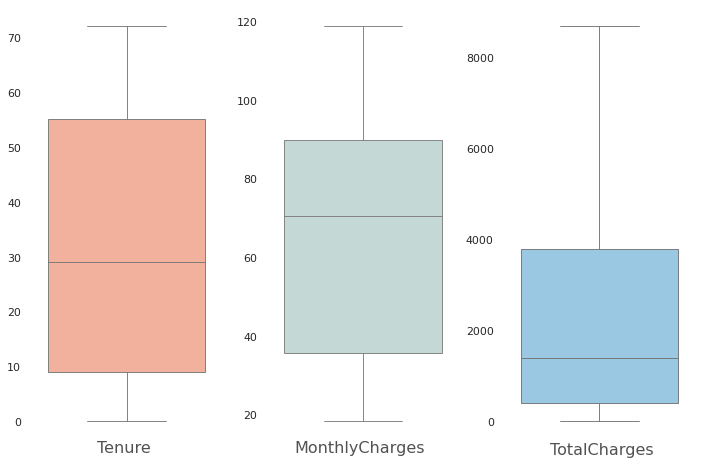

In [29]:
#Criando a figura
fig, ax = plt.subplots( ncols=3, figsize=(12, 8))

#Retirando as Spines
sns.despine(top=True, right=True, left=True,bottom=True)

#Criando e configurando o primeiro boxplot
box1=sns.boxplot(y=df_clean.tenure,  ax=ax[0], linewidth=.9, color='#ffaa8f')
box1.text(-0.15, -5.5, 'Tenure', fontsize=16, color=cinza_texto)
box1.set(ylabel=None)

#Criando e configurando o segundo boxplot
box2=sns.boxplot(y=df_clean.MonthlyCharges,  ax=ax[1], linewidth=.9, color='#c0ddd7')
box2.text(-0.35, 10.5, 'MonthlyCharges', fontsize=16, color=cinza_texto)
box2.set(ylabel=None)

#Criando e configurando o terceiro boxplot
box3=sns.boxplot(y=df_clean.TotalCharges,  ax=ax[2], linewidth=.9, color='#8ecaee')
box2.text(0.95, 10, 'TotalCharges', fontsize=16, color=cinza_texto)
box3.set(ylabel=None)

#Exibindo
plt.show()

Utilizando os método `describe` já notamos que o dataframe não aparenta possuir outliers: os quartis estão bem distribuidos, os valores de média e mediana estão dentro do esperado e o desvio padrão está condizente com o restante dos dados.

Ao plotarmos os boxplots podemos visualizar claramente que no dataframe está livre de outliers, de modo que podemos passar para a próxima etapa na análise onde verificaremos o balanceamento da variável alvo `Churn`.

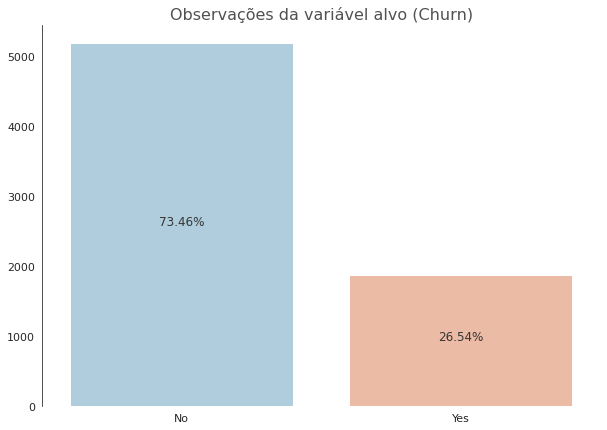

In [30]:
#Criando a figura
fig, ax = plt.subplots(figsize=(10, 7))

#Retirando as Spines
sns.despine(top=True, right=True, bottom=True)

#Plotando
sns.countplot(x=df_clean.Churn, palette='RdBu_r')

#Configurando o plot
ax.set_title('Observações da variável alvo (Churn)',fontsize=16, color=cinza_texto)
ax.set(xlabel=None)
ax.set(ylabel=None)


#Inserindo a porcentagem de cada observação dentro do plot
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()/df_clean.shape[0]*100), (p.get_x()+0.32, p.get_height()/2), color='#363636', fontsize=12)

#Exibindo
plt.show()

Percebemos que a variável está desbalanceada, a porcentagem de observações `no` para a variável `Churn` é de 73.46%, muito superior aos 26.54% da observação `yes`. Isso é algo que deverá ser tratado em etapas posteriores, já que manter uma variável desbalanceada dessa forma e utiliza-la em um modelo nos trará uma grande quantidade de falsos-negativos.

Continuando com nossa análise, vejamos agora a porcentagem de `Churn` que cada uma das variáveis do dataset possui, faremos isso plotando alguns gráficos de barra empilhadas (`Stacked Barplot`) confrontando os diferentes valores únicos de cada variável com a variável alvo.

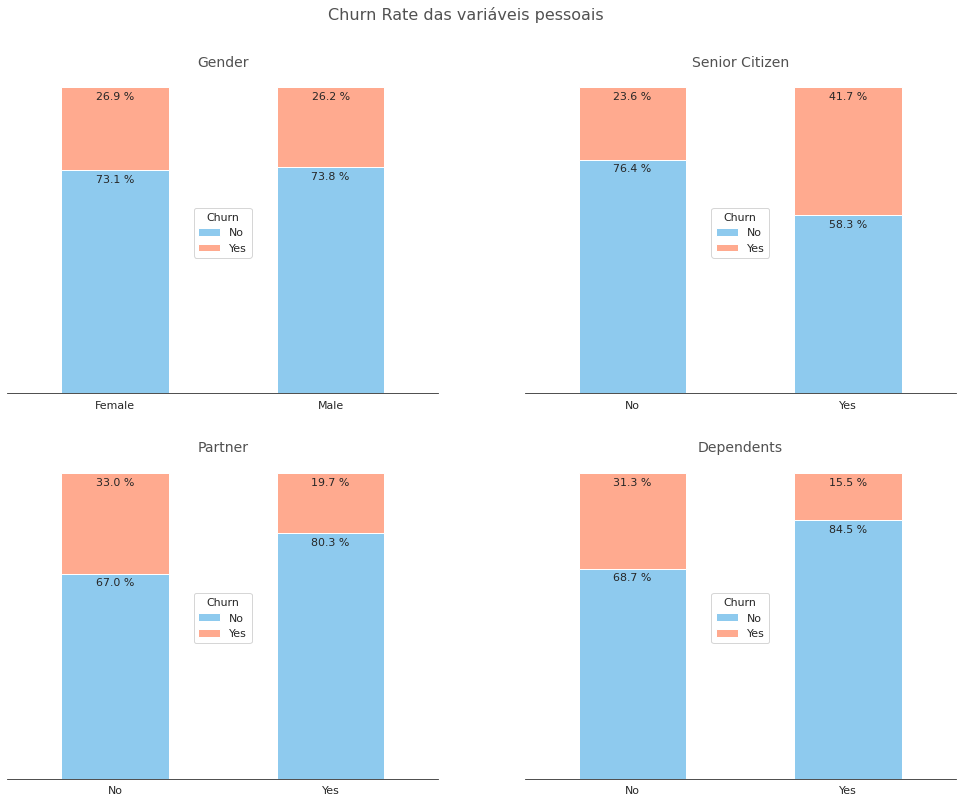

In [155]:
#Criando as crosstabs para os plots
df_gender = pd.crosstab(index = df_clean.gender,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_senior = pd.crosstab(index = df_clean.SeniorCitizen,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_partner = pd.crosstab(index = df_clean.Partner,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_dependents = pd.crosstab(index = df_clean.Dependents,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

#Criando a figura
fig, ax = plt.subplots(figsize=(17, 13), ncols=2, nrows=2)
st = fig.suptitle("Churn Rate das variáveis pessoais", fontsize="16", color=cinza_texto, y=.95)

#Plotando
ax1=df_gender.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[0][0])

ax2=df_senior.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[0][1])

ax3=df_partner.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[1][0])

ax4=df_dependents.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[1][1])

#Removendo as spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)

#Configurando o plot
ax1.set_title("Gender", 
              fontsize=14, 
              color=cinza_texto)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_yticklabels([])
ax1.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax1.tick_params(rotation='auto')

ax2.set_title("Senior Citizen", 
              fontsize=14, 
              color=cinza_texto)
ax2.set_xticklabels(['No','Yes'])
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_yticklabels([])
ax2.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax2.tick_params(rotation='auto')

ax3.set_title("Partner", 
              fontsize=14,
              color=cinza_texto)
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_yticklabels([])
ax3.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax3.tick_params(rotation='auto')

ax4.set_title("Dependents", 
              fontsize=14,
              color=cinza_texto)
ax4.set_xlabel(None)
ax4.set_ylabel(None)
ax4.set_yticklabels([])
ax4.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax4.tick_params(rotation='auto')

#Inserindo a porcentagem de cada observação dentro do plot
for p in ax1.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax1.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax2.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax2.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)
   
for p in ax3.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax3.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax4.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax4.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)       

#Exibindo
plt.show()

Iniciando com as variáveis que contém dados pessoais de cada cliente (`Gender`,`SeniorCitizen`,`Partner` e `Dependents`) podemos retirar algumas informações importantes:

 - Não existe diferença significativa na quantidade de contratos cancelados entre homens e mulheres, o *churn rate* fica em aproximadamente **26%** para ambos os gêneros;
 - Idosos possuem uma taxa de *churn* significativmente maior em relação às pessoas mais jovens (quase o dobro);
 - Clientes que possuem parceiros e/ou dependentes cancelam menos contratos em comparação a clientes que não possuem. No caso da variável `Dependents` a taxa para clientes **com dependentes** é a metade da taxa para clientes **sem dependentes**.

 Continuando, vamos comparar as variáveis que possuem características técnicas de cada serviço contratado (`MultipleLines`,`InternetService`,`OnlineSecurity`,`OnlineBackup`,`DeviceProtection`,`TechSupport`,`StreamingTV` e `StreamingMovies`)

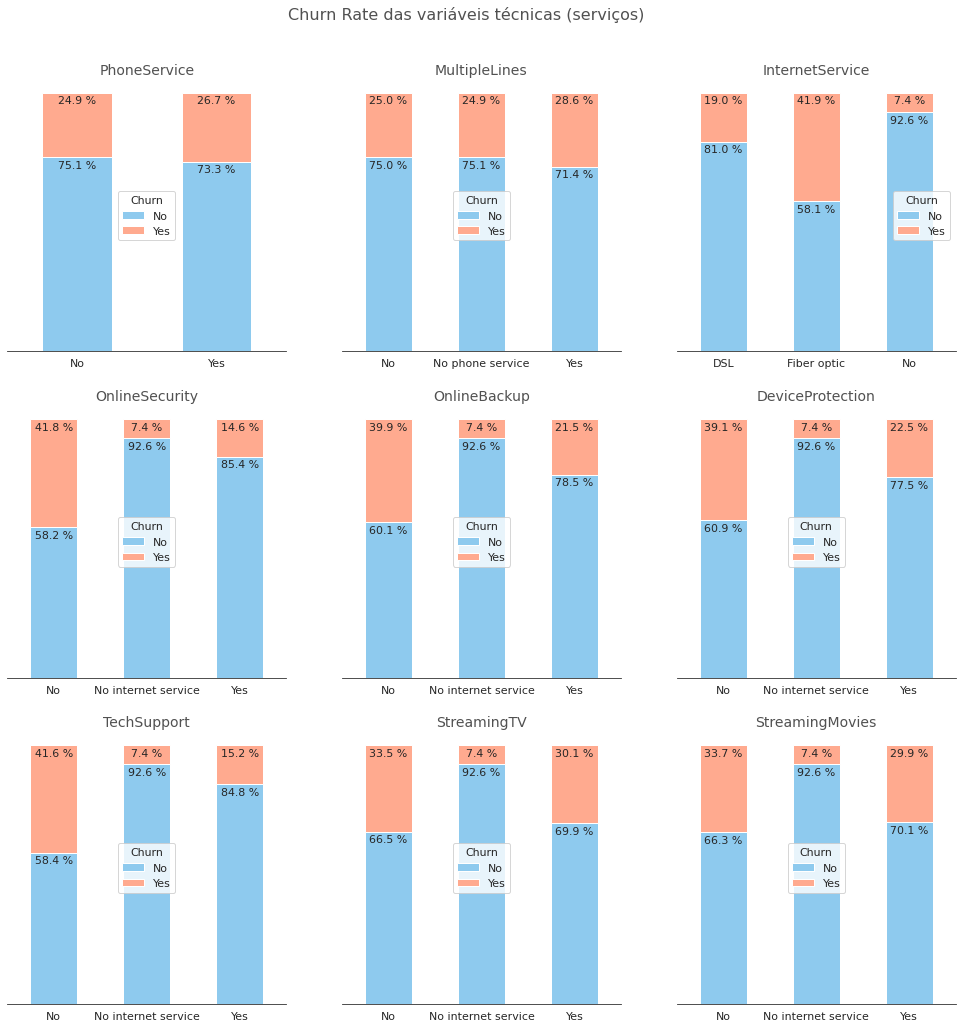

In [160]:
#Criando as crosstabs para os plots
df_phone = pd.crosstab(index = df_clean.PhoneService,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_lines = pd.crosstab(index = df_clean.MultipleLines,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_internet = pd.crosstab(index = df_clean.InternetService,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_security = pd.crosstab(index = df_clean.OnlineSecurity,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_backup = pd.crosstab(index = df_clean.OnlineBackup,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_device = pd.crosstab(index = df_clean.DeviceProtection,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_support = pd.crosstab(index = df_clean.TechSupport,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_tv = pd.crosstab(index = df_clean.StreamingTV,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_movies = pd.crosstab(index = df_clean.StreamingMovies,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

#Criando a figura
fig, ax = plt.subplots(figsize=(17, 17), ncols=3, nrows=3)
st = fig.suptitle("Churn Rate das variáveis técnicas (serviços)", fontsize="16", color=cinza_texto, y=.94)

#Plotando
ax1=df_phone.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[0][0])

ax2=df_lines.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[0][1])

ax3=df_internet.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[0][2])

ax4=df_security.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[1][0])

ax5=df_backup.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[1][1])

ax6=df_device.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[1][2])

ax7=df_support.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[2][0])

ax8=df_tv.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[2][1])

ax9=df_movies.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[2][2])

#Removendo as spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)

ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_visible(False)

ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['left'].set_visible(False)

ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.spines['left'].set_visible(False)

ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.spines['left'].set_visible(False)

ax9.spines['top'].set_visible(False)
ax9.spines['right'].set_visible(False)
ax9.spines['left'].set_visible(False)

#Configurando o plot
ax1.set_title("PhoneService", 
              fontsize=14, 
              color=cinza_texto)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_yticklabels([])
ax1.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax1.tick_params(rotation='auto')

ax2.set_title("MultipleLines", 
              fontsize=14, 
              color=cinza_texto)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_yticklabels([])
ax2.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax2.tick_params(rotation='auto')

ax3.set_title("InternetService", 
              fontsize=14, 
              color=cinza_texto)
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_yticklabels([])
ax3.legend(['No','Yes'],
           loc="center right",
           title="Churn")
ax3.tick_params(rotation='auto')

ax4.set_title("OnlineSecurity", 
              fontsize=14,
              color=cinza_texto)
ax4.set_xlabel(None)
ax4.set_ylabel(None)
ax4.set_yticklabels([])
ax4.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax4.tick_params(rotation='auto')

ax5.set_title("OnlineBackup", 
              fontsize=14,
              color=cinza_texto)
ax5.set_xlabel(None)
ax5.set_ylabel(None)
ax5.set_yticklabels([])
ax5.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax5.tick_params(rotation='auto')

ax6.set_title("DeviceProtection", 
              fontsize=14, 
              color=cinza_texto)
ax6.set_xlabel(None)
ax6.set_ylabel(None)
ax6.set_yticklabels([])
ax6.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax6.tick_params(rotation='auto')

ax7.set_title("TechSupport", 
              fontsize=14, 
              color=cinza_texto)
ax7.set_xlabel(None)
ax7.set_ylabel(None)
ax7.set_yticklabels([])
ax7.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax7.tick_params(rotation='auto')

ax8.set_title("StreamingTV", 
              fontsize=14,
              color=cinza_texto)
ax8.set_xlabel(None)
ax8.set_ylabel(None)
ax8.set_yticklabels([])
ax8.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax8.tick_params(rotation='auto')

ax9.set_title("StreamingMovies", 
              fontsize=14,
              color=cinza_texto)
ax9.set_xlabel(None)
ax9.set_ylabel(None)
ax9.set_yticklabels([])
ax9.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax9.tick_params(rotation='auto')

#Inserindo a porcentagem de cada observação dentro do plot
for p in ax1.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax1.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax2.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax2.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)
   
for p in ax3.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax3.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax4.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax4.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)  

for p in ax5.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax5.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax6.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax6.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)
   
for p in ax7.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax7.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax8.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax8.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)  

for p in ax9.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax9.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)                             

#Exibindo
plt.show()



Podemos ter mais algumas observações interessantes ao avaliarmos as variáveis técnicas:

- As variáveis `PhoneService`  e `MultipleLines`, ambas tratando-se de serviços telefônicos, também não possuem uma diferenças significativa na quantidade de contratos cancelados;

- Clientes que **não** possuem serviços de internet contratados tem uma baixa taixa de *churn*, apenas **7.4%**;

- Em contrapartida, clientes que possuem fibra ótica contratada possuem uma taixa muito alta de cancelamento, próximo aos **42%**.

- Clientes que possuem serviço de internet sem serviços adicionais de proteção e suporte (`OnlineSecurity`,`OnlineBackup`,`DeviceProtection` e `TechSupport`) tendem a ter uma taixa maior de cancelamento;

- Por outro lado, clientes que contratam esses serviços adicionais de proteção e suporte, principalmente os serviços de segurança online (`OnlineSecurity`) e suporte técnico (`TechSupport`), acabam por ter um *churn rate* menor;

- Serviços de *streaming* (`StreamingTV` e `StreamingMovies`) não apaentam impactar tanto na quantidade de contratos cancelados, já que essas variáveis possuem uma taxa de *churn* próximas tanto para clientes com ou sem esses serviços contratados.

Ficamos agora com 6 variáveis que tratam de dados referentes ao contrato e aos pagamentos realizados pelos serviços contratados, porém essas variáveis possuem tanto dados categóricos (`Contract`, `PaperlessBilling` e `PaymentMethod`) quanto numéricos (`tenure`, `MonthlyCharges` e `TotalCharges`), de modo que as análises serão divididas.

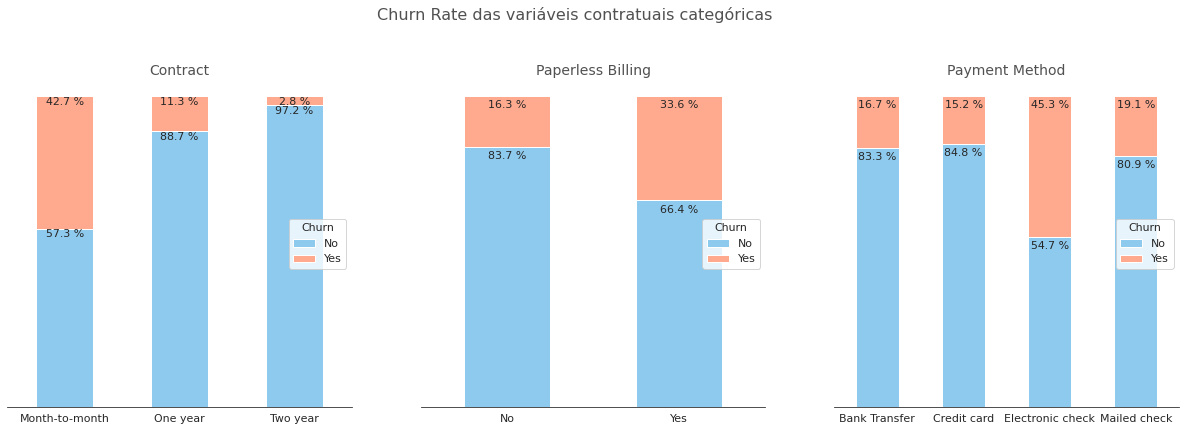

In [138]:
#Criando as crosstabs para os plots
df_contract = pd.crosstab(index = df_clean.Contract,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_billing = pd.crosstab(index = df_clean.PaperlessBilling,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_payment = pd.crosstab(index = df_clean.PaymentMethod,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

#Criando a figura
fig, ax = plt.subplots(figsize=(21, 6), ncols=3, nrows=1)
st = fig.suptitle("Churn Rate das variáveis contratuais categóricas", fontsize="16", color=cinza_texto, y=1.05)

#Plotando
ax1=df_contract.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[0])

ax2=df_billing.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[1])

ax3=df_payment.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[2])


#Removendo as spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

#Configurando o plot
ax1.set_title("Contract", 
              fontsize=14, 
              color=cinza_texto)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_yticklabels([])
ax1.legend(['No','Yes'],
           loc="center right",
           title='Churn')
ax1.tick_params(rotation='auto')

ax2.set_title("Paperless Billing", 
              fontsize=14, 
              color=cinza_texto)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_yticklabels([])
ax2.legend(['No','Yes'],
           loc="center right",
           title='Churn')
ax2.tick_params(rotation='auto')

ax3.set_title("Payment Method", 
              fontsize=14,
              color=cinza_texto)
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_yticklabels([])
ax3.legend(['No','Yes'],
           loc="center right",
           title='Churn')
ax3.tick_params(rotation='auto')

#Inserindo a porcentagem de cada observação dentro do plot
for p in ax1.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax1.text(x+width/2, 
            y+height-1.8, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax2.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax2.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)
   
for p in ax3.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax3.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

  
#Exibindo
plt.show()


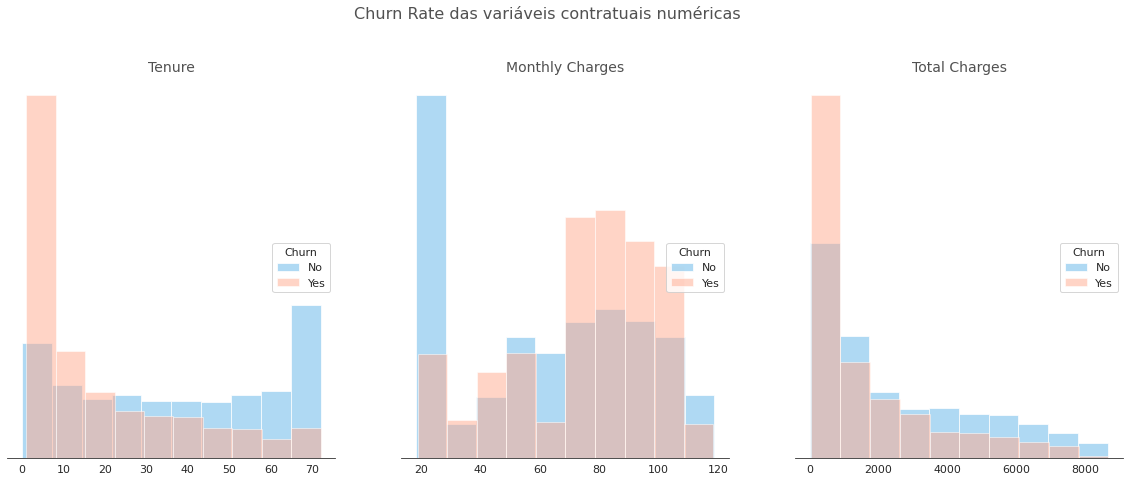

In [157]:
#Criando a figura
fig, ax = plt.subplots(figsize=(20, 7), ncols=3)
st = fig.suptitle("Churn Rate das variáveis contratuais numéricas", fontsize="16", color=cinza_texto, y=1.02)

#Plotando
df_clean[df_clean['Churn']=='No']['tenure'].plot(kind='hist', 
                                                 ax=ax[0], 
                                                 density=True,
                                                 alpha=0.7, 
                                                 color='#8ecaee', 
                                                 label='No')
df_clean[df_clean['Churn']=='Yes']['tenure'].plot(kind='hist', 
                                                  ax=ax[0], 
                                                  density=True,
                                                  alpha=0.5, 
                                                  color='#ffaa8f', 
                                                  label='Yes')

df_clean[df_clean['Churn']=='No']['MonthlyCharges'].plot(kind='hist', 
                                                         ax=ax[1], 
                                                         density=True, 
                                                         alpha=0.7, 
                                                         color='#8ecaee', 
                                                         label='No')
df_clean[df_clean['Churn']=='Yes']['MonthlyCharges'].plot(kind='hist', 
                                                          ax=ax[1], 
                                                          density=True, 
                                                          alpha=0.5, 
                                                          color='#ffaa8f', 
                                                          label='Yes')

df_clean[df_clean['Churn']=='No']['TotalCharges'].plot(kind='hist', 
                                                       ax=ax[2], 
                                                       density=True,
                                                       alpha=0.7, 
                                                       color='#8ecaee', 
                                                       label='No')
df_clean[df_clean['Churn']=='Yes']['TotalCharges'].plot(kind='hist', 
                                                        ax=ax[2], 
                                                        density=True,
                                                        alpha=0.5, 
                                                        color='#ffaa8f', 
                                                        label='Yes')
  
#Removendo as spines
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)  

#Configurando o plot
ax[0].set_title("Tenure", 
              fontsize=14, 
              color=cinza_texto)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_yticklabels([])
ax[0].legend(['No','Yes'],
           loc="center right",
           title='Churn')
ax[0].tick_params(rotation='auto')

ax[1].set_title("Monthly Charges", 
              fontsize=14, 
              color=cinza_texto)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_yticklabels([])
ax[1].legend(['No','Yes'],
           loc="center right",
           title='Churn')
ax[1].tick_params(rotation='auto')

ax[2].set_title("Total Charges", 
              fontsize=14,
              color=cinza_texto)
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].set_yticklabels([])
ax[2].legend(['No','Yes'],
           loc="center right",
           title='Churn')
ax[2].tick_params(rotation='auto')

#Exibindo
plt.show()